In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import sys
import numpy as np

sys.path.insert(0, str(Path.cwd() / 'preparation/'))

import data_loader
import preprocess

Loading JSON file config/dataset_config.json
Loading JSON file config/features_info.json
Loading JSON file config/item_definition_index_map.json
Loading JSON file config\features_info.json


In [3]:
sample = data_loader.load_csv_as_df('../../csgo_dataset/parsed_files/renegades-vs-fnatic-m3-inferno.csv')
only_pos_sample = sample[data_loader.get_feature_column_names('PositionX') + data_loader.get_feature_column_names('PositionY')]

In [4]:
tick = 83330.0	

In [5]:
#sample.loc[tick-100:tick+100,data_loader.get_feature_column_names('PositionX')[0]]


In [16]:
print(only_pos_sample.columns)

tick = 83330.0	
#tick = np.random.choice(sample.index)

directions = preprocess.all_player_eyeAngles_to_direction_vec3(sample,tick)
positions = preprocess.all_player_position_to_vec3(sample,tick)

raw_positions_x = sample.loc[tick, data_loader.get_feature_column_names('PositionX')].to_numpy()
raw_positions_y = sample.loc[tick, data_loader.get_feature_column_names('PositionY')].to_numpy()

positions_x = [a.components()[0] for a in positions]
positions_y = [a.components()[1] for a in positions]

end_positions_x = [a.__add__(b).components()[0] for a,b in zip(positions,directions)]
end_positions_y = [a.__add__(b).components()[1] for a,b in zip(positions,directions)]


print(raw_positions_x)

Index(['f_0_PositionX', 'f_1_PositionX', 'f_2_PositionX', 'f_3_PositionX',
       'f_4_PositionX', 'f_5_PositionX', 'f_6_PositionX', 'f_7_PositionX',
       'f_8_PositionX', 'f_9_PositionX', 'f_0_PositionY', 'f_1_PositionY',
       'f_2_PositionY', 'f_3_PositionY', 'f_4_PositionY', 'f_5_PositionY',
       'f_6_PositionY', 'f_7_PositionY', 'f_8_PositionY', 'f_9_PositionY'],
      dtype='object')
[-321.36124 -456.16748 -553.577   -656.0078  -562.46936 1009.48615
 1130.0033  1449.1742  1092.374   2197.3096 ]


In [1]:
x,y = positions_x, positions_y
#x,y = raw_positions_x, raw_positions_y
plt.plot(x, y, "o")

x_min, x_max = np.amin(only_pos_sample[data_loader.get_feature_column_names('PositionX')].min()), np.amax(only_pos_sample[data_loader.get_feature_column_names('PositionX')].max())
y_min, y_max = np.amin(only_pos_sample[data_loader.get_feature_column_names('PositionY')].min()), np.amax(only_pos_sample[data_loader.get_feature_column_names('PositionY')].max())

print(x_min,x_max)
print(y_min,y_max)
print("Tick: " + str(tick))

#plt.xlim(-500,500)
#plt.ylim(-500,500)
for pos_x, pos_y, end_pos_x,  end_pos_y in zip(positions_x,positions_y,end_positions_x,end_positions_y):
    plt.plot([pos_x, pos_y], [end_pos_x, end_pos_y], 'm-')


NameError: name 'positions_x' is not defined

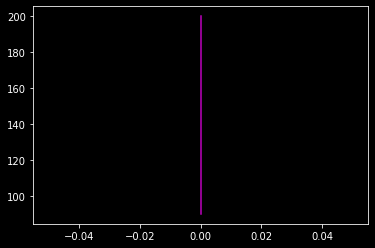

In [6]:
plt.plot([0, 0], [90, 200], 'm-')